**Import Libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew

**Loading `california_housing` data**

In [2]:
data = fetch_california_housing()
X, y = data.data, data.target
target_names = data.target_names
feature_names = data.feature_names

**Describing Data**

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

**Split `train/test` data**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Explore train data**

In [5]:
eda = pd.DataFrame(data=X_train, columns = feature_names)
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
eda.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965


**How are the median house prices distributed?**

Text(0, 0.5, 'Frequency')

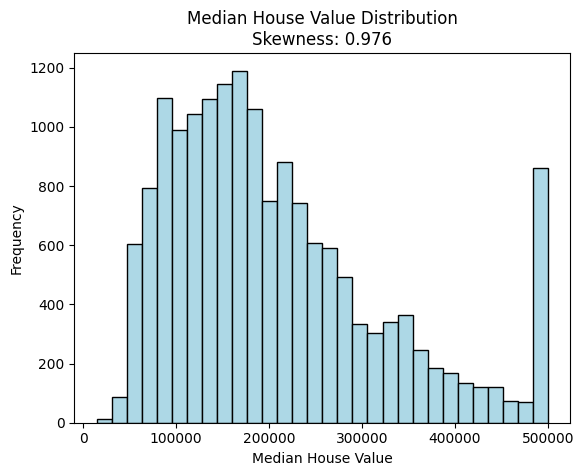

In [25]:
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')    # y_train*100000 in hundread thousand
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.3f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

**Model fitting and clusters**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

**Making Prediction**

In [26]:
y_pred_test = model.predict(X_test)

**Evaluating Model**

In [34]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f'Mean Absolutely Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolutely Error (MAE): 0.3257
Mean Squared Error (MSE): 0.2553
Root Mean Squared Error (RMSE): 0.5052
R² Score: 0.8052


**Observation**

The mean absolute error is $32,570.

So, on average, predicted median house prices are off by $33k.

Mean squared error is less intuitive to interpret, but is usually what is being minimized by the model fit.
On the other hand, taking the square root of MSE yields a dollar value, here RMSE = $50,520.

An R-squared score of 0.80 is not considered very high. It means the model explains about %80 of the variance in median house prices, although this interpretation can be misleading for compex data with nonlinear relationships, skewed values, and outliers. R-squard can still be useful for comparing models though.

These statistics alone don't explain any details about the performance of the model. For example, where did the model do well or poorly?

**Plot actual vs predicted values**

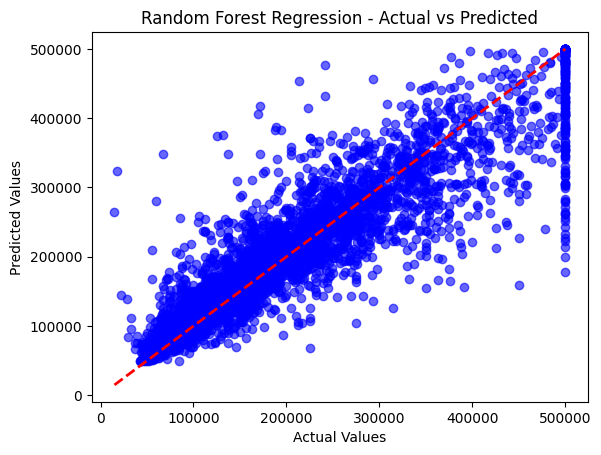

In [39]:
plt.scatter(1e5*y_test, 1e5*y_pred_test, color='blue', alpha=0.6)
plt.plot([1e5*y_test.min(), 1e5*y_test.max()], [1e5*y_test.min(), 1e5*y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

**Plot `histogram` of residuals (errors)**

Average Error: -1239
Standard deviation of errors: 50508


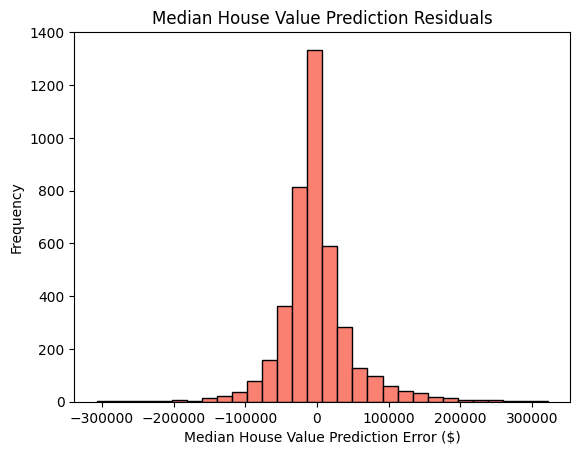

In [43]:
residuals = 1e5*(y_test-y_pred_test)
plt.hist(residuals, color='salmon', bins=30, edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print(f'Average Error: {int(np.mean(residuals))}')
print(f'Standard deviation of errors: {int(np.std(residuals))}')

**Plot the model residual errors by median house value**

In [65]:
residual_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})
residual_df.head()

,Actual,Residuals
0,47700.0,-1221.00
1,45800.0,-31626.00
2,500001.0,31279.51
3,218600.0,-34083.00
4,278000.0,37206.00


**Sort `residual_df` wrt `Actual`**

In [66]:
residual_df = residual_df.sort_values(by='Actual')

**Plot the data**

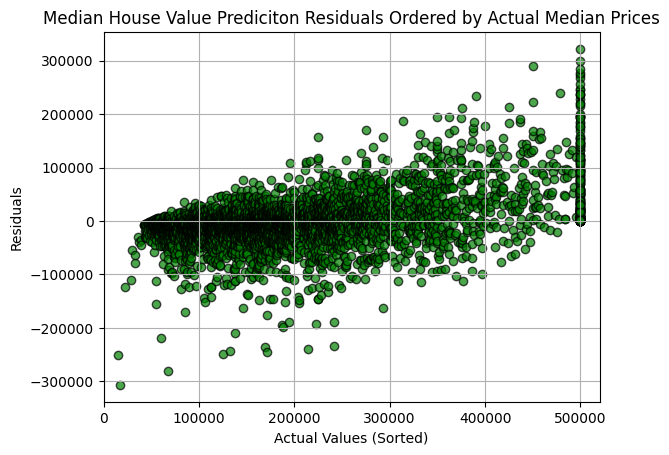

In [75]:
plt.scatter(residual_df['Actual'], residual_df['Residuals'], color='green', alpha=0.7, edgecolors='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.xlim(0, 520000)
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

**Observation**

Although we saw a small average residual of only -$1239, you can see from this plot that the average error as a function of median house price is actually increasing from negative to positive values. In other words, lower median prices tend to be overpredicted while higher median prices tend to be underpredicted.

**Displaying `Feature Importance` by barchart**

In [123]:
feature_imp = model.feature_importances_
indices = np.argsort(feature_imp)[::-1]
feature_imp

array([0.52485594, 0.05437908, 0.04436144, 0.02961109, 0.03083076,
       0.13826513, 0.08895462, 0.08874194])

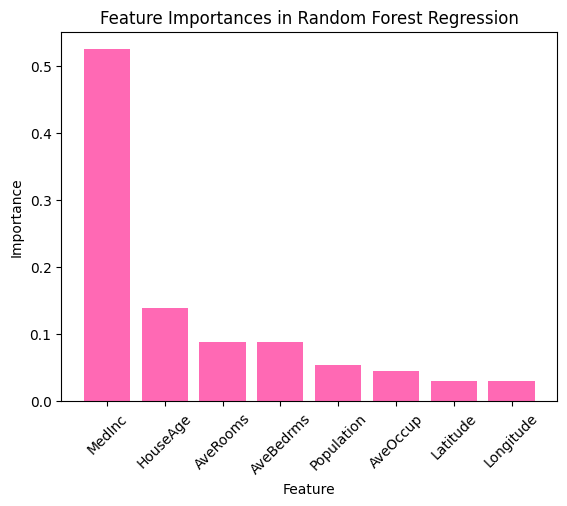

In [132]:
plt.bar(x=feature_names, height=feature_imp[indices], align='center', color='hotpink')
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()

**Observation**

It makes sense that median incomes and house prices would be correlated, so it's not surprising that median income is the most important feature.
I would think that location must be a significant factor.

Since location is implied by two separate variables, latitude and longitude that share equal importances, we might speculate that location is really the second most important feature. This is because replacing latitude and longitude with a categorical location at an appropriate level of granularity (suburb, city, etc.) would likely have a combined lat/lng importance, which might outweigh average occupancy.

Might average occupancy and average number of bedrooms be correlated?

A proper analysis of the feature set would include a correlation matrix.

**Will the skewness affect the performance of Random Forest regression?**

Compared to linear regression, random forest regression is quite robust against outliers and skewed distributions. This is because random forest regression doesn't make any assumptions about the data distribution, where linear regression performs best with normally distributed data.

**Do we need to standardize the data?**

Standardizing the data isn't necessary like it is for distance-based algortihms like KNN or SVMs.